Correlation between ln(-c_interface_mean) and TC_mean: 0.7811, p-value: 6.6553e-63


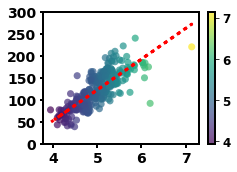

Correlation between c_interface_mean_to1 and TC_mean: -0.6187, p-value: 4.4356e-33


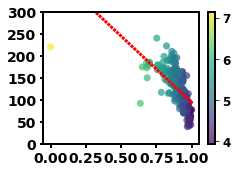

Correlation between SAM_length_gm_mean_to1 and TC_mean: -0.3120, p-value: 3.3841e-08


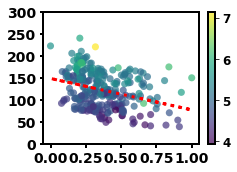

Correlation between Water_bending_overlap_factor_to1 and TC_mean: 0.2624, p-value: 4.0706e-06


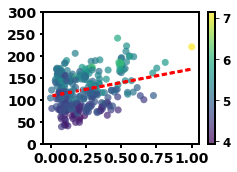

Correlation between Water_stretching_overlap_factor_to1 and TC_mean: 0.2951, p-value: 1.9277e-07


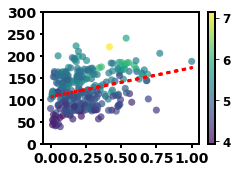

Correlation between 5P1Z and TC_mean: 0.7963, p-value: 4.9908e-67


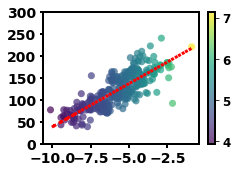

Correlation between 6P1F and TC_mean: -0.8049, p-value: 1.6210e-69


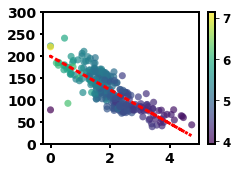

Correlation between 7P2Z and TC_mean: 0.8314, p-value: 5.1687e-78


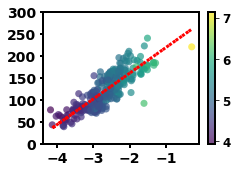

Correlation between 8P1F and TC_mean: -0.8411, p-value: 1.6598e-81


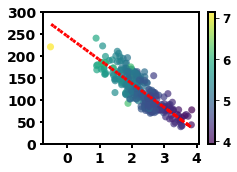

Correlation between 9P1F and TC_mean: -0.8454, p-value: 3.6389e-83


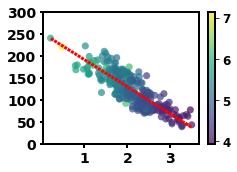

Correlation between 12P1Z and TC_mean: 0.8507, p-value: 3.0768e-85


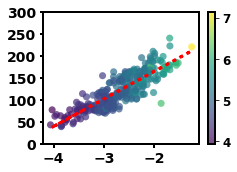

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

file_path = './formula_data.csv'
all_data = pd.read_csv(file_path)
y = all_data['TC_mean']

X_columns = all_data.columns[all_data.columns != "SAMindex"]
X_columns = X_columns[X_columns != "TC_mean"]

for col in X_columns:
    X = all_data[col]
    
    if X.isnull().any() or y.isnull().any():
        print(f"Warning: {col} contains NaN values. Skipping this column.")
        continue
    
    color_data = all_data['ln(-c_interface_mean)']
    
    if color_data.isnull().any():
        print(f"Warning: c_interface_mean_to1 contains NaN values. Skipping this column.")
        continue
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    fit_line = slope * X + intercept

    plt.figure(figsize=(3.5, 2.5))
    scatter = plt.scatter(X, y, c=color_data, cmap='viridis', alpha=0.7, edgecolor='none', s=50)  
    plt.plot(X, fit_line, color='red', lw=3, linestyle='dotted')
    plt.ylim(0.0, 300.0)

    cbar = plt.colorbar(scatter)
    
    for spine in cbar.ax.spines.values():
        spine.set_linewidth(2)  

    cbar.ax.yaxis.label.set_size(14) 
    cbar.ax.yaxis.label.set_weight('bold') 


    cbar.ax.tick_params(labelsize=12)
    for label in cbar.ax.get_yticklabels():
        label.set_fontsize(12) 
        label.set_weight('bold')  
        
    plt.tick_params(axis='both', which='major', width=2)  
    plt.tick_params(axis='both', which='minor', width=1) 
    plt.tick_params(axis='both', labelsize=10)  

    for spine in plt.gca().spines.values():
        spine.set_linewidth(2) 
        
    plt.yticks([0, 50, 100, 150, 200, 250, 300], fontsize=14, fontweight='bold')  
    plt.xticks(fontsize=14, fontweight='bold') 

    correlation_coefficient, p_value = stats.pearsonr(X, y)
    print(f'Correlation between {col} and TC_mean: {correlation_coefficient:.4f}, p-value: {p_value:.4e}')
    
    name = col + '.jpg'
    plt.tight_layout()
    plt.savefig(name, dpi=800)
    plt.show()